# Wrangling and Analyzing Data - WeRateDogs

## *Trevor Stuart* - May 5, 2018

## Introduction

The focus of this project is the wrangling and analysis of data collected from Twitter, from the user WeRateDogs. The goal is to wrangle and clean the appropriate data, draw appropriate conclusions, and create meaningful visualizations.

In [2]:
# Import libraries to be used in the project.

import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import csv
import sys
import os
import time
import glob
import datetime as dt
import seaborn as sns
%matplotlib inline
import re

## Gathering Data

In [3]:
# Read and set twitter_archive_enhanced.csv as a pd dataframe.

wrd_df = pd.read_csv('twitter-archive-enhanced.csv')
wrd_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Download image prediction file

folder = 'image_predictions'
if not os.path.exists(folder):
    os.makedirs(folder)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
get_url = requests.get(url)

with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(get_url.content)

In [4]:
# Set image predictions to df

wrd_image_df = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

In [5]:
wrd_image_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
consumer_key = 'I0f5JPtlep0hxXZIfCAQlvFwB'
consumer_secret = 'STyJEXfWrvD2Nq4jE3WPAEYBTBgXRSNM4vd0FSCPtGUUXinl7o'
access_token = '532517805-0FFPlCeKufoSFZojoqG7eixJbwfuojcUNQKINBnO'
access_secret = 'r9rg3noZB2Y9y7PnzmDMgdiVhWTizD7KZqpjnCBogoAoh'

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [8]:
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in wrd_df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 727
Rate limit reached. Sleeping for: 726


In [9]:
tweets_data = []
tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [10]:
wrd_tweetinfo_df = pd.DataFrame()
wrd_tweetinfo_df['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
wrd_tweetinfo_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
wrd_tweetinfo_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [11]:
wrd_tweetinfo_df.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8615,38888
1,892177421306343426,6329,33297


In [19]:
# I'm making CSV copies of all my dataframes - some of the above code was taking a long time to run, 
# and I didn't want to have to rerun several times. 

wrd_df.to_csv("copy_twitter_archive.csv", index=False)
wrd_image_df.to_csv("copy_image_predictions.csv", index=False)
wrd_tweetinfo_df.to_csv("copy_tweet_json.csv", index=False)

In [2]:
# Panda df copies

wrd = wrd_df.copy()
wrd_image = wrd_image_df.copy()
wrd_tweetinfo = wrd_image_df.copy()

## Assessing Data

> Start by looking at the data using 'head' and 'tail' functions.

In [42]:
wrd.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [43]:
wrd.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
2066,666082916733198337,2015-11-16 02:38:37,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6,10,NaN,NaN
2067,666073100786774016,2015-11-16 01:59:36,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10,10,NaN,NaN
2068,666071193221509120,2015-11-16 01:52:02,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9,10,NaN,NaN
2069,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN
2070,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN


In [44]:
wrd_image.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [45]:
wrd_image.tail()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False


In [46]:
wrd_tweetinfo.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8615,38888
1,892177421306343426,6329,33297
2,891815181378084864,4200,25093
3,891689557279858688,8726,42252
4,891327558926688256,9497,40399


In [47]:
wrd_tweetinfo.tail()

,tweet_id,retweet_count,favorite_count
2340,666049248165822465,40,109
2341,666044226329800704,141,300
2342,666033412701032449,44,125
2343,666029285002620928,47,130
2344,666020888022790149,519,2562


> Using 'info' function to look at the make up of the data in the dataframes.

In [48]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 9 columns):
tweet_id              2071 non-null int64
timestamp             2071 non-null object
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  1391 non-null object
dog_type              330 non-null object
dtypes: int64(3), object(6)
memory usage: 145.7+ KB


In [49]:
wrd_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


In [50]:
wrd_tweetinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


## Quality Issues

- I need to remove '&amp' and replace with '&' in the 'wrd' dataframe.
- Retweets need to be removed.
- I need to change 'ID' to 'tweet_id' in wrd_tweetinfo dataframe to match the other dataframes.
- Dog breed names need to be capitalized in the prediction columns (p1, p2, p3) in the the image prediction dataframe
- Remove underscores and replace with spaces in wrd_image.
- There are a lot of random words that are incorrectly placed in the 'wrd' dataframe - these need to be removed.
- Remove duplicates in wrd_tweetinfo.
- Change the time_stamp from a 'str' to a datetime object.

## Tidiness Issues

- Combine the 'type' columns (doggo, floofer, pupper, puppo) into a single variable.
- Get rid of unnecessary columns in the image prediction dataframe.

### Define
Changing the 'id' column in wrd_tweetinfo to 'tweet_id' to match the other dataframes.

### Code

In [51]:
# Changing wrd_tweetinfo dataframe's 'id' to 'tweet_id' to match the other dataframes - need to do this before merging df's.

wrd_tweetinfo.columns = ['tweet_id' if x=='id' else x for x in wrd_tweetinfo.columns]

### Test

In [ ]:
wrd_tweetinfo.head(2)

### Define
Getting Rid of unnecessary retweet columns.

### Code

In [55]:
# Getting rid of all retweet data.

wrd.drop(wrd[wrd['retweeted_status_id'].notnull()==True].index, inplace=True)
wrd.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [ ]:
wrd.head(2)

### Define
Concatenating dogtype column and dropping unnecessary data.

### Code

In [56]:
# combine dog type columns in wrd

wrd['dog_type'] = (wrd['doggo'].map(str) + wrd['floofer'].map(str) + wrd['pupper'].map(str) + wrd['puppo'].map(str))
wrd.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [ ]:
wrd.head(2)

### Define
Getting Rid of unnecessary concatenated data in 'dog_type' column and changing 'None' values to NaN.

### Code

In [58]:
# Fix the new 'dog_type' column

wrd.loc[wrd['dog_type'].str.contains('NoneNoneNoneNone'), 'dog_type'] = 'NaN'
wrd.loc[wrd['dog_type'].str.contains('doggo'), 'dog_type'] = 'doggo'
wrd.loc[wrd['dog_type'].str.contains('floofer'), 'dog_type'] = 'floofer'
wrd.loc[wrd['dog_type'].str.contains('pupper'), 'dog_type'] = 'pupper'
wrd.loc[wrd['dog_type'].str.contains('puppo'), 'dog_type'] = 'puppo'

### Test

In [ ]:
wrd.head(2)

### Define
Capitalizing all words in dog breed names and replacing underscores with spaces.

### Code

In [59]:
# Capitalize dog breed names and remove underscores in wrd_image.

wrd_image['p1'] = wrd_image['p1'].str.replace('_', ' ')
wrd_image['p2'] = wrd_image['p2'].str.replace('_', ' ')
wrd_image['p3'] = wrd_image['p3'].str.replace('_', ' ')

wrd_image['p1'] = wrd_image['p1'].str.title()
wrd_image['p2'] = wrd_image['p2'].str.title()
wrd_image['p3'] = wrd_image['p3'].str.title()

### Test

In [ ]:
wrd_image.head()

### Define
Fix text column strings that contain '&amp;amp;' - replace with '&'.

### Code

In [60]:
# Replace '&amp;' with '&'.

wrd['text'] = wrd['text'].str.replace("'&amp;'", '&')

### Test

In [ ]:
wrd.head(2)

### Define
Converting 'timestamp' column in wrd df to a datetime object.

### Code

In [61]:
# Convert timestamp str to datetime.

wrd['timestamp'] = pd.to_datetime(wrd['timestamp'])

### Test

In [ ]:
wrd.info()

### Define
Remove duplicate tweets in wrd_tweetinfo dataframe.

### Code

In [62]:
# Remove duplicates in 'tweet_id' in wrd_tweetinfo.

wrd_tweetinfo = wrd_tweetinfo.drop_duplicates(subset = ['tweet_id'], keep='first')

### Test

In [ ]:
wrd_tweetinfo.info()

### Define
Removing non-names from 'name' column in wrd dataframe.

### Code

In [64]:
# Remove non-names from wrd.

wrd.drop(wrd[wrd['name'].str.islower()].index, inplace=True)
wrd.loc[wrd['name'].str.contains('None'), 'name'] = 'NaN'

### Test

In [ ]:
wrd.head()

### Define
Remove unnecessary columns in image prediction dataframe.

### Code

In [71]:
# Remove unnecessary columns.

wrd_image.drop(['img_num'], axis=1, inplace=True)
wrd.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

### Test

In [ ]:
wrd_image.head()

### Define


### Code

In [16]:
#Fix rating_numerators that have decimals

wrd[wrd['text'].str.contains(r"(\d+\.\d*\/\d+)")]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
41,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,NaN
550,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN
609,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,pupper
1465,681340665377193984,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,9.50,10,NaN,NaN
1487,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,NaN,NaN


In [13]:
# Fix incorrect ratings

wrd.loc[(wrd['tweet_id'] == 883482846933004288), ['rating_numerator']] = 13.5
wrd.loc[(wrd['tweet_id'] == 786709082849828864), ['rating_numerator']] = 9.75
wrd.loc[(wrd['tweet_id'] == 778027034220126208), ['rating_numerator']] = 11.27
wrd.loc[(wrd['tweet_id'] == 681340665377193984), ['rating_numerator']] = 9.5
wrd.loc[(wrd['tweet_id'] == 680494726643068929), ['rating_numerator']] = 11.26

### Test

In [15]:
wrd.head(45)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo


In [6]:
# Convert CSV files to cleaned versions of dataframes

wrd.to_csv("copy_twitter_archive.csv", index=False)
wrd_image.to_csv("copy_image_predictions.csv", index=False)
wrd_tweetinfo.to_csv("copy_tweet_json.csv", index=False)

## Store Combined Clean Dataframes

In [3]:
# Merge all of my dataframes into a master df.

wrd_master = pd.merge(wrd, wrd_image, how='left', on = ['tweet_id']) #combine the first two
wrd_master = pd.merge(wrd_master, wrd_tweetinfo, how='left', on = ['tweet_id']) # add the third

In [66]:
# Save combined dataframes to master csv

wrd_master.to_csv('twitter_archive_master.csv')

In [3]:
# read new csv master file.

wrd_master = pd.read_csv('twitter_archive_master.csv')

In [3]:
wrd_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 22 columns):
Unnamed: 0            2071 non-null int64
tweet_id              2071 non-null int64
timestamp             2071 non-null object
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  1391 non-null object
dog_type              330 non-null object
jpg_url               1896 non-null object
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null object
retweet_count         2071 non-null

## Analyzing and Visualizing Data

The focus of my analysis is discovering any correlation between the 'rating_numerator' and the popularity of the tweet based on the number of favorites and retweets. I want to measure how random the ratings of the dogs are - or find out if the author of the tweet actually rates more interesting content with a higher rating. I will only be looking at the most common rating of 8-14. All outliers will be discarded.

In [4]:
# Creating day of week column to look at correlation between tweet popularity and the day of the week.

wrd_master['timestamp'] = pd.to_datetime(wrd_master['timestamp'])
wrd_master['day_of_week'] = wrd_master['timestamp'].dt.weekday_name

In [5]:
wrd_day = wrd_master.groupby(wrd_master['day_of_week'])['retweet_count'].sum()

In [5]:
# Dividing the rating numerator by the rating denominator to create a rating column.

wrd_master['rating'] = wrd_master['rating_numerator']/wrd_master['rating_denominator']

In [6]:
# Deleting outliers - only want rating numerators of 8-14.

valuelist = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4]
wrd_8to14 = wrd_master[wrd_master['rating'].isin(valuelist)]

In [12]:
wrd_8to14_count = wrd_8to14.groupby(wrd_master['rating']).size()
print(wrd_8to14_count)

rating
0.8     91
0.9    142
1.0    421
1.1    415
1.2    487
1.3    300
1.4     39
dtype: int64


In [60]:
wrd_8to14_rt = wrd_8to14.groupby(wrd_master['rating'])['retweet_count'].sum()
print(wrd_8to14_rt)

rating
0.8      82766
0.9     114283
1.0     615653
1.1     902571
1.2    1439557
1.3    1956781
1.4     325813
Name: retweet_count, dtype: int64


In [66]:
wrd_8to14_fv = wrd_8to14.groupby(wrd_master['rating'])['favorite_count'].sum()
print(wrd_8to14_fv)

rating
0.8     224333
0.9     340706
1.0    1705961
1.1    2805914
1.2    5162517
1.3    6385112
1.4    1005472
Name: favorite_count, dtype: int64


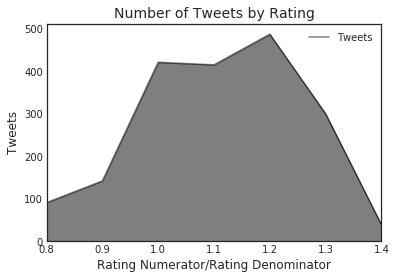

In [62]:
# Visualization showing the number of tweets at each rating

fig, ax = plt.subplots()
sns.set_style("white")
wrd_8to14_count.plot(kind='area', color='k', alpha=0.5)
ax.set_title('Number of Tweets by Rating', fontsize=14)
ax.legend(['Tweets'])
ax.set_ylabel('Tweets', fontsize=12)
ax.set_xlabel('Rating Numerator/Rating Denominator', fontsize=12);

The graph above shows the number of tweets that received ratings of 8 to 14. I wanted to see which numbers showed up in the ratings most frequently. It was interesting that scores of 10 and 11 were almost equal, and that there was a sharp dropoff to scores of 14.

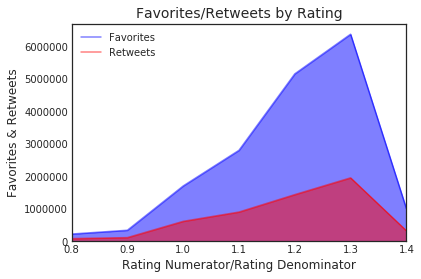

In [87]:
# Visualization depicting the popularity of tweets at certain ratings

fig, ax = plt.subplots()
sns.set_style("white")
wrd_8to14_fv.plot(kind='area', color='b', alpha=0.5)
wrd_8to14_rt.plot(kind='area', color='r', alpha=0.5)
ax.set_title('Favorites/Retweets by Rating', fontsize=14)
ax.legend(['Favorites', 'Retweets'])
ax.set_ylabel('Favorites & Retweets', fontsize=12)
ax.set_xlabel('Rating Numerator/Rating Denominator', fontsize=12);

This graph shows the total number of favorites and retweets of tweets at their respective ratings. The graph came out as exactly as expected with higher rated dogs getting being more popular. But this outcome actually came as a surprise as I assumed before the project that the ratings were comedically random, and the author wasn't honestly rating the dogs. 

In [101]:
wrd_8to14_fvmean = wrd_8to14.groupby(wrd_master['rating'])['favorite_count'].mean()
print(wrd_8to14_fvmean)

rating
0.8     2465.197802
0.9     2399.338028
1.0     4052.163895
1.1     6761.238554
1.2    10600.650924
1.3    21283.706667
1.4    25781.333333
Name: favorite_count, dtype: float64


In [100]:
wrd_8to14_rtmean = wrd_8to14.groupby(wrd_master['rating'])['retweet_count'].mean()
print(wrd_8to14_rtmean)

rating
0.8     909.516484
0.9     804.809859
1.0    1462.358670
1.1    2174.869880
1.2    2955.969199
1.3    6522.603333
1.4    8354.179487
Name: retweet_count, dtype: float64


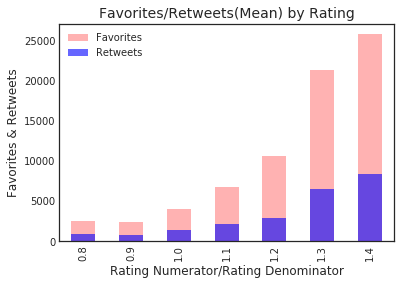

In [106]:
# Visualization depicting the popularity of tweets at certain ratings by mean

fig, ax = plt.subplots()
sns.set_style("white")
wrd_8to14_fvmean.plot(kind='bar', color='r', alpha=0.3)
wrd_8to14_rtmean.plot(kind='bar', color='b', alpha=0.6)
ax.set_title('Favorites/Retweets(Mean) by Rating', fontsize=14)
ax.legend(['Favorites', 'Retweets'])
ax.set_ylabel('Favorites & Retweets', fontsize=12)
ax.set_xlabel('Rating Numerator/Rating Denominator', fontsize=12);

The graph above depicts that mean ratings for tweets with ratings from 8 to 14. I was interested in looking at how popular tweets were on average, which took out the number of tweets as a variable. It seems the graph works exactly like one would think it would except that 8's are a hair more popular on average.